<a href="https://colab.research.google.com/github/Ninja7328/Encryptix/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Setup and import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)


In [12]:
 # Load the dataset
df = pd.read_csv('creditcard.csv')

# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [13]:
# Display first few rows
df.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62    0.0  
1    2.69    0.0  
2  378.66    0.0  
3  123.50    0.0  
4   69.99    0.0

In [17]:
# Data preprocessing
# Check for missing values
print("Missing values in each column before handling:")
print(df.isna().sum())

Missing values in each column before handling:
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [18]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [19]:
# Standardize the 'Amount' feature
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

In [22]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

In [26]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Adjust k_neighbors to a lower value
X_resampled, y_resampled = smote.fit_resample(X, y)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [28]:
# Initialize and train models with hyperparameter tuning
def tune_model(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [29]:
# Logistic Regression
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
best_lr = tune_model(LogisticRegression(random_state=42), lr_params, X_train, y_train)
y_pred_lr = best_lr.predict(X_test)

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
best_rf = tune_model(RandomForestClassifier(random_state=42), rf_params, X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Gradient Boosting
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
best_gb = tune_model(GradientBoostingClassifier(random_state=42), gb_params, X_train, y_train)
y_pred_gb = best_gb.predict(X_test)

In [30]:
# Evaluate models
def evaluate_model(y_test, y_pred, y_proba, model_name):
    print(f"{model_name} Model Performance:")
    print(classification_report(y_test, y_pred))

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    print(f"Precision-Recall AUC: {auc_pr:.2f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_roc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {auc_roc:.2f}")

    return precision, recall, fpr, tpr, auc_pr, auc_roc

In [32]:
# Logistic Regression evaluation
precision_lr, recall_lr, fpr_lr, tpr_lr, auc_pr_lr, auc_roc_lr = evaluate_model(y_test, y_pred_lr, best_lr.predict_proba(X_test)[:,1], "Logistic Regression")

Logistic Regression Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       508
         1.0       0.99      1.00      0.99       484

    accuracy                           0.99       992
   macro avg       0.99      1.00      0.99       992
weighted avg       1.00      0.99      0.99       992

Precision-Recall AUC: 1.00
ROC AUC: 1.00


In [33]:
# Random Forest evaluation
precision_rf, recall_rf, fpr_rf, tpr_rf, auc_pr_rf, auc_roc_rf = evaluate_model(y_test, y_pred_rf, best_rf.predict_proba(X_test)[:,1], "Random Forest")

Random Forest Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       508
         1.0       1.00      1.00      1.00       484

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992

Precision-Recall AUC: 1.00
ROC AUC: 1.00


In [34]:
# Gradient Boosting evaluation
precision_gb, recall_gb, fpr_gb, tpr_gb, auc_pr_gb, auc_roc_gb = evaluate_model(y_test, y_pred_gb, best_gb.predict_proba(X_test)[:,1], "Gradient Boosting")


Gradient Boosting Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       508
         1.0       1.00      1.00      1.00       484

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992

Precision-Recall AUC: 1.00
ROC AUC: 1.00


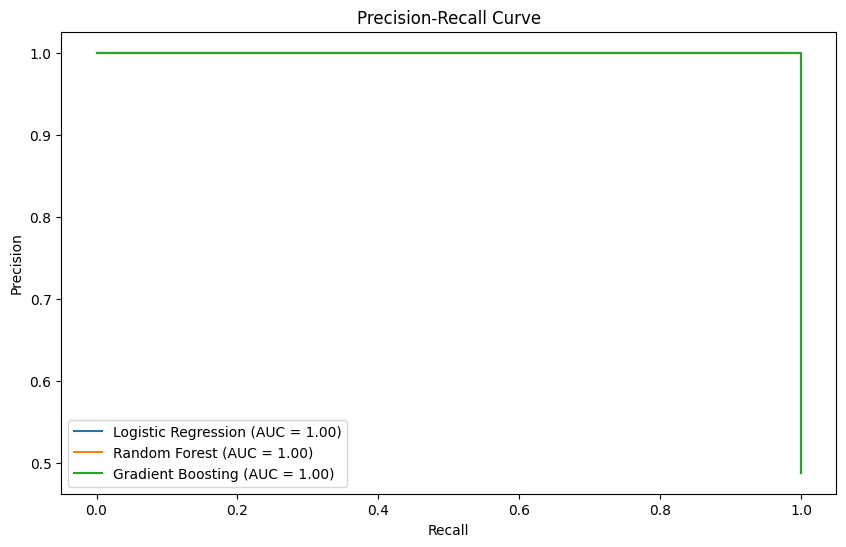

In [35]:
# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_pr_lr:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_pr_rf:.2f})')
plt.plot(recall_gb, precision_gb, label=f'Gradient Boosting (AUC = {auc_pr_gb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

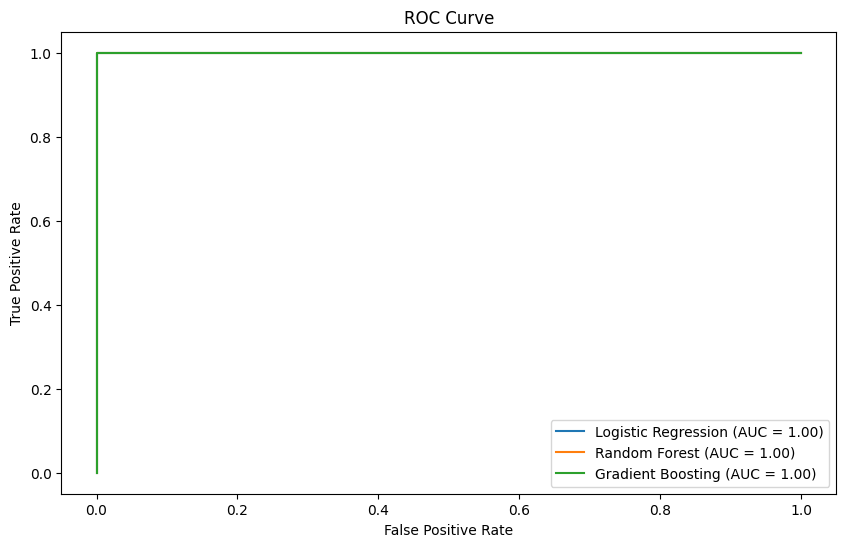

In [36]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_roc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_roc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_roc_gb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

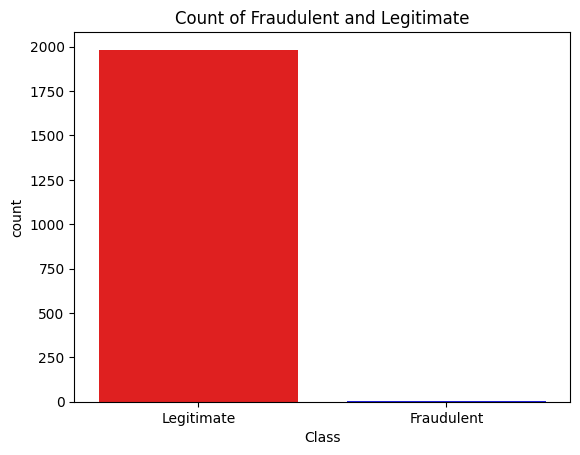

In [37]:
# Visualization
# Splitting the data into Fraud and Non Fraud according to Class
fraud = df[df["Class"] == 1]
non_fraud = df[df["Class"] == 0]

# Visualizing count of Fraudulent and Legitimate transactions
palette = ['red', 'blue']  # red for Fraud, Blue for Non Fraud
sns.countplot(x='Class', data=df, palette=palette)

new_labels = ['Legitimate', 'Fraudulent']
plt.xticks(ticks=[0, 1], labels=new_labels)
plt.title("Count of Fraudulent and Legitimate")
plt.show()

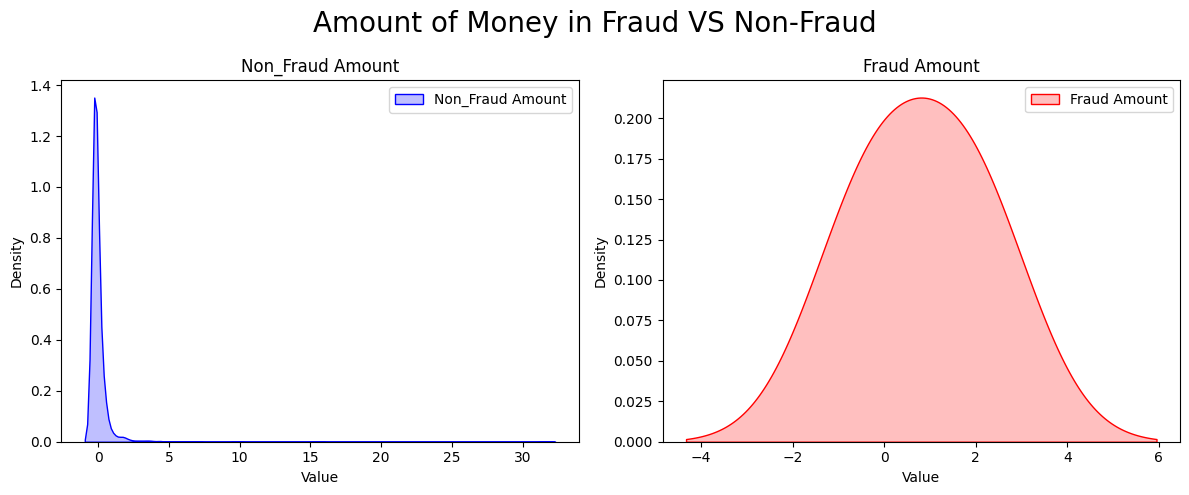

In [38]:
# KDE for the amount of money per transaction in the Fraud and Non Fraud transaction
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(non_fraud["Amount"], color='blue', label='Non_Fraud Amount', ax=axes[0], fill=True)
axes[0].set_title('Non_Fraud Amount')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].legend()

sns.kdeplot(fraud["Amount"], color='red', label='Fraud Amount', ax=axes[1], fill=True)
axes[1].set_title('Fraud Amount')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.suptitle("Amount of Money in Fraud VS Non-Fraud", fontsize=20)
plt.tight_layout()
plt.show()

<Axes: >

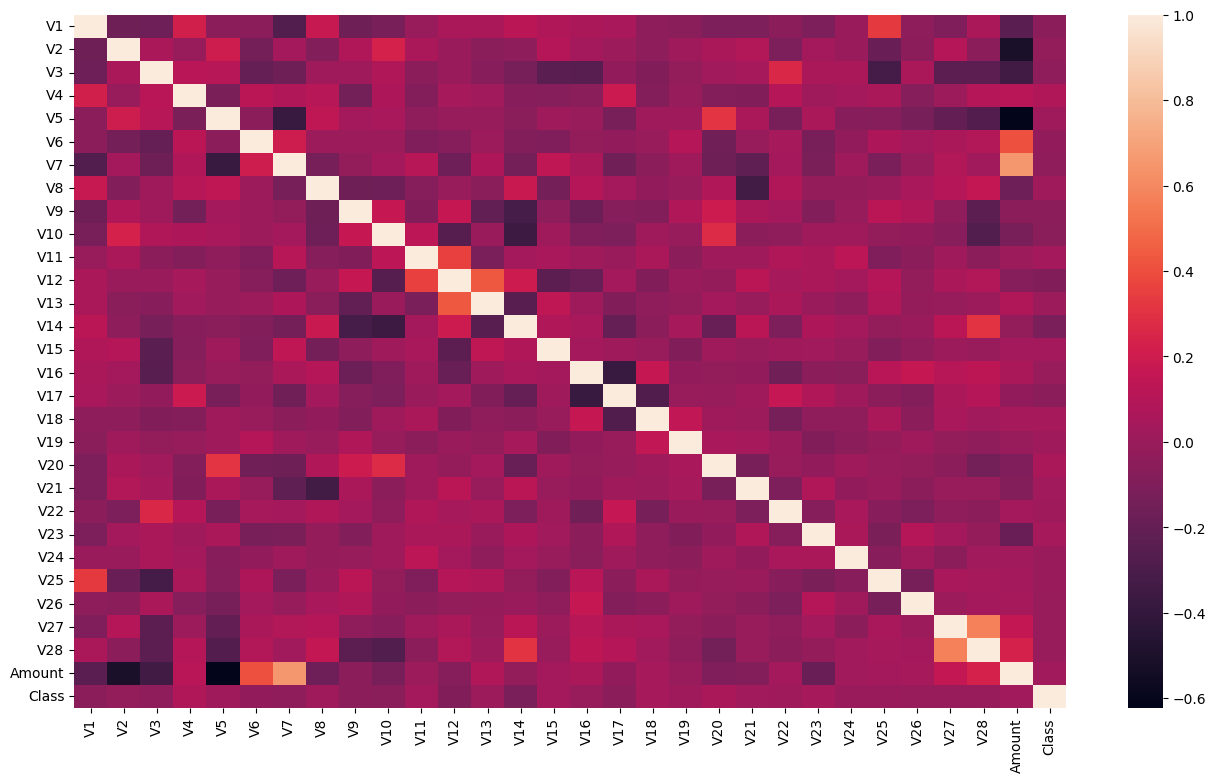

In [39]:
# Heatmap for the correlation matrix
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr())

In [42]:
# Box plot for the amount of money per transaction in the Fraud and Non Fraud transaction
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'notebook'
fig = go.Figure()
fig.add_trace(go.Box(y=non_fraud["Amount"], name='Non Fraud Amount', marker_color='green'))
fig.add_trace(go.Box(y=fraud["Amount"], name="Fraud Amount", marker_color='darkviolet'))

fig.update_layout(
    title="Box Plot for Amount in Fraud VS Non Fraud",
    xaxis_title="Category",
    yaxis_title="Values"
)

fig.show()

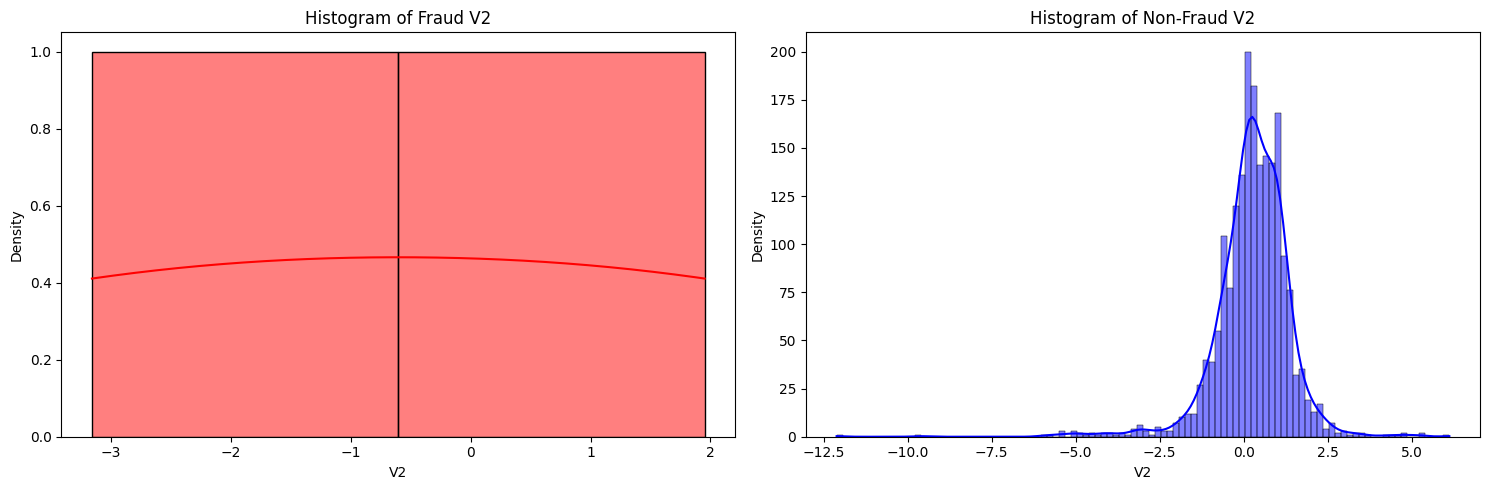

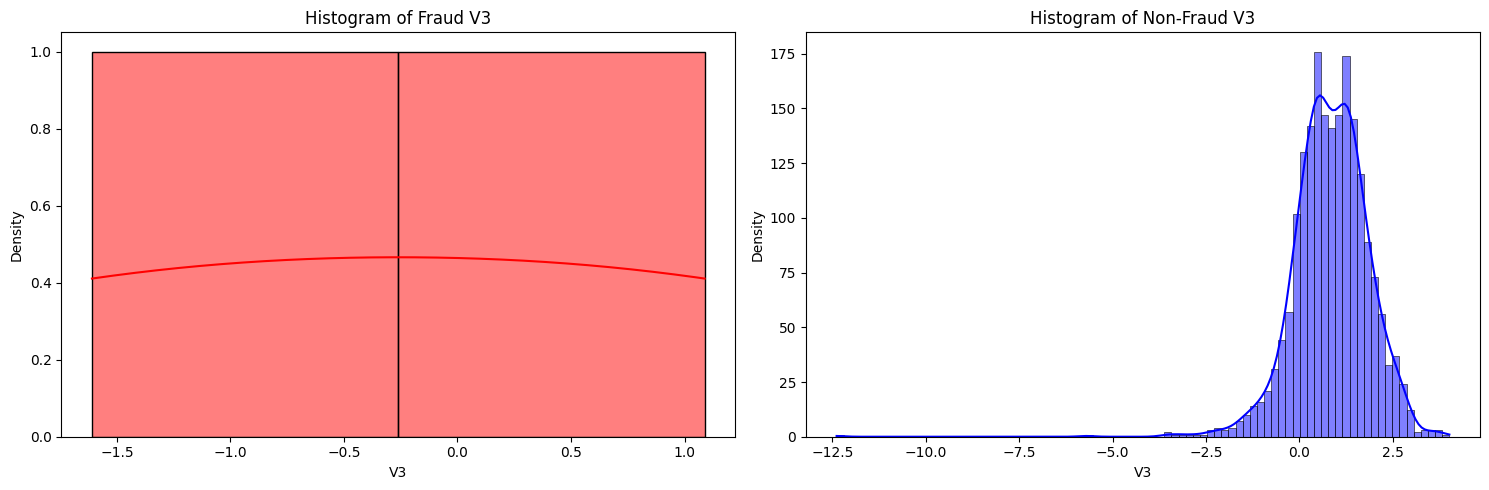

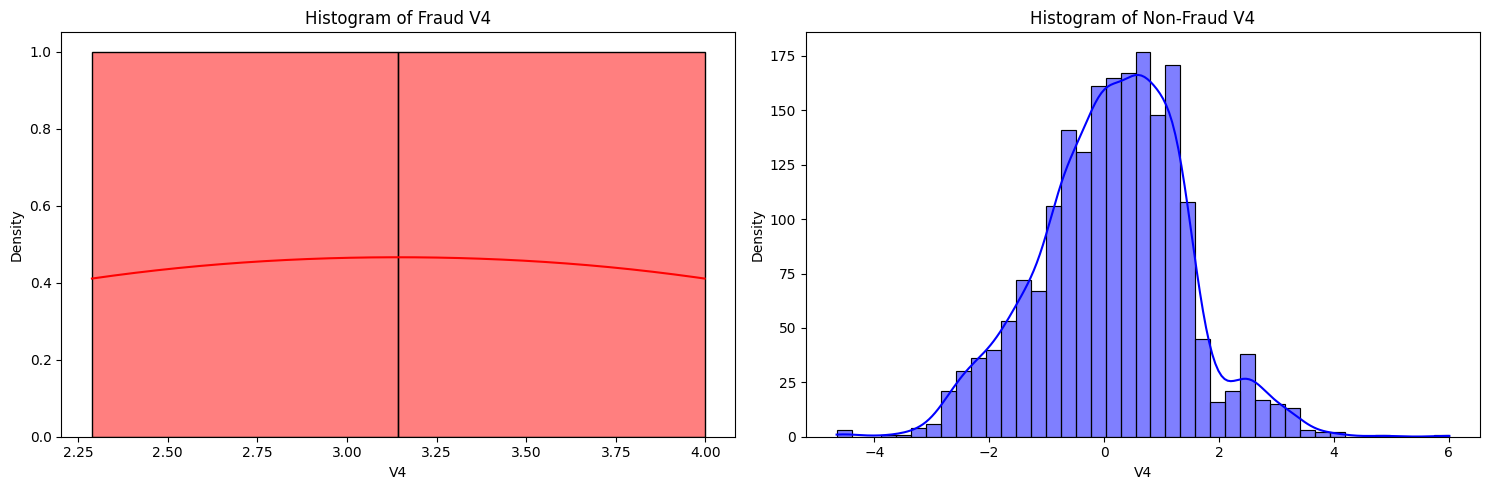

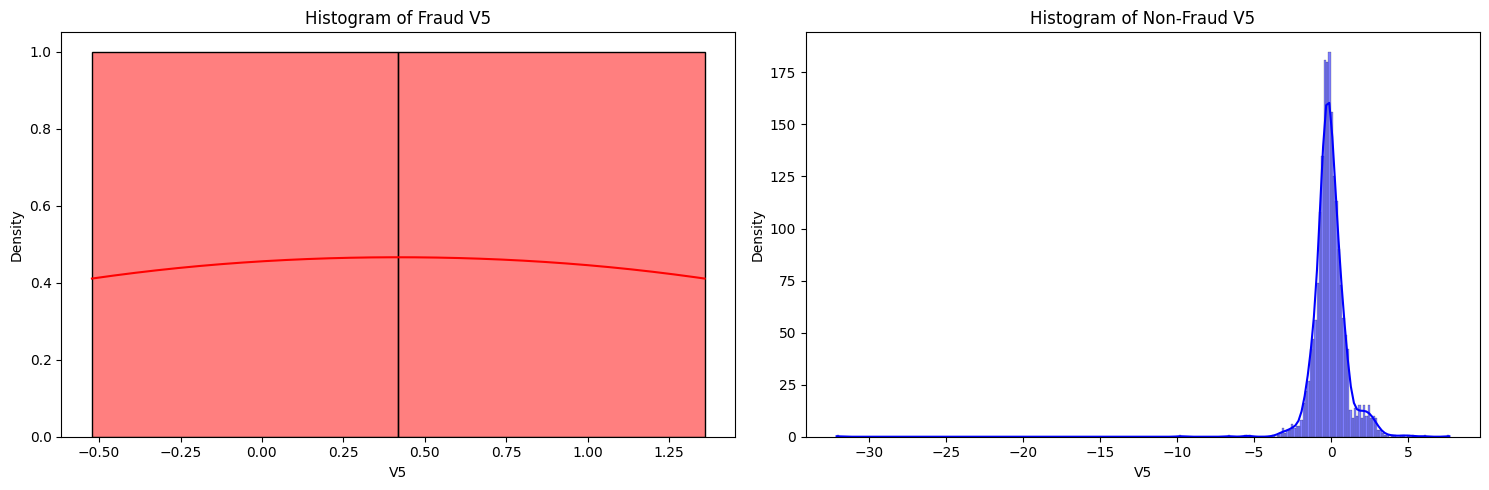

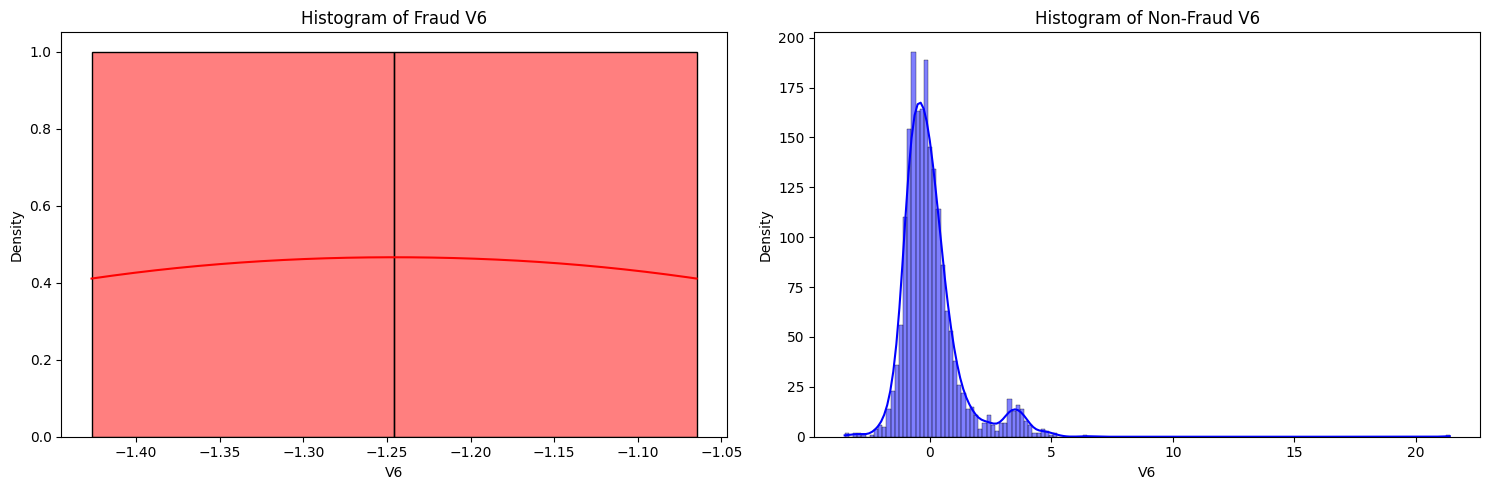

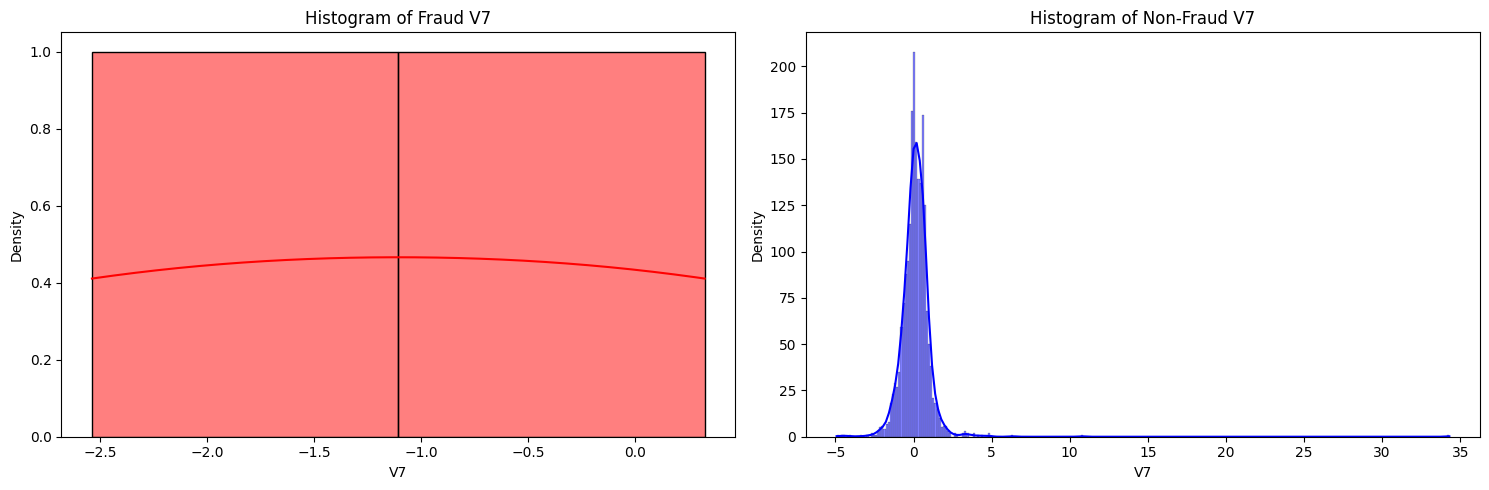

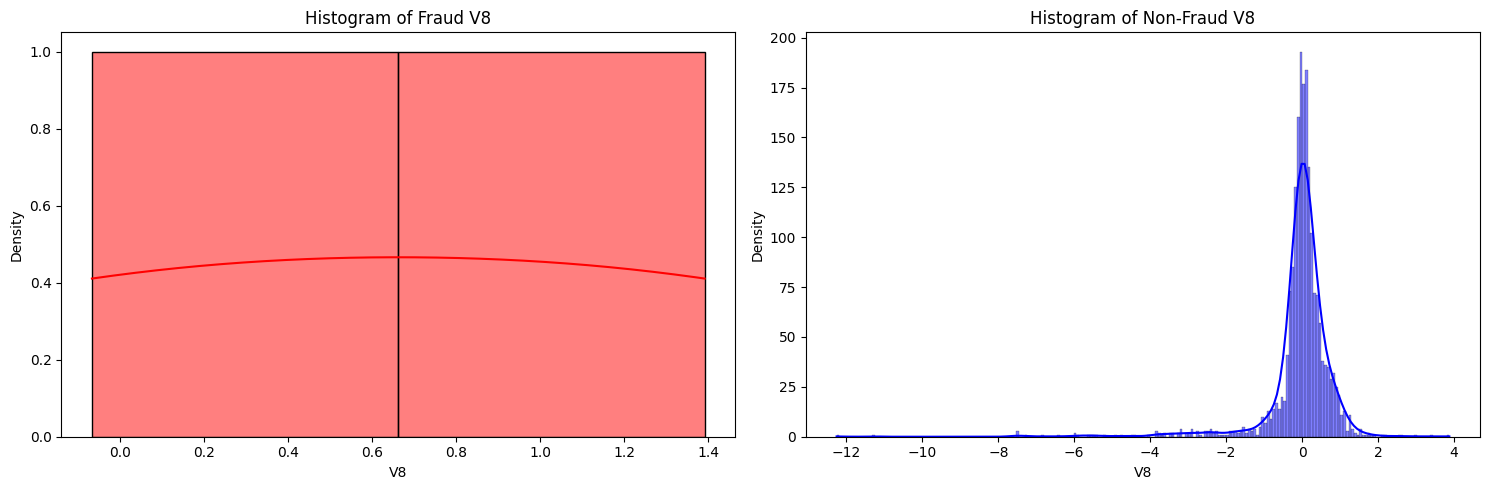

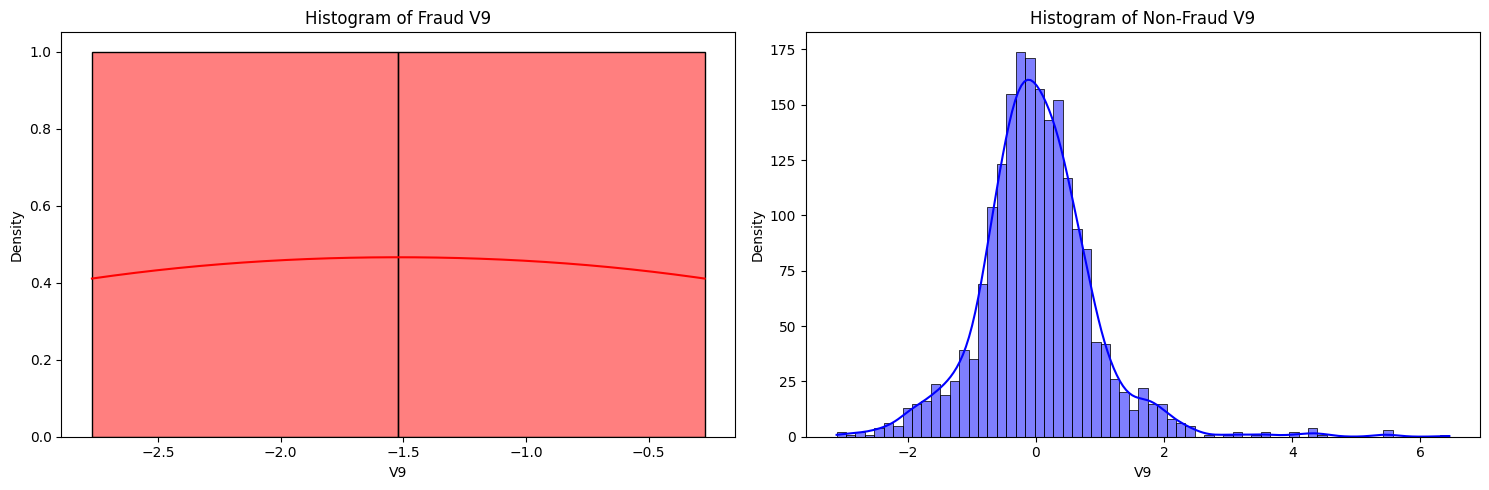

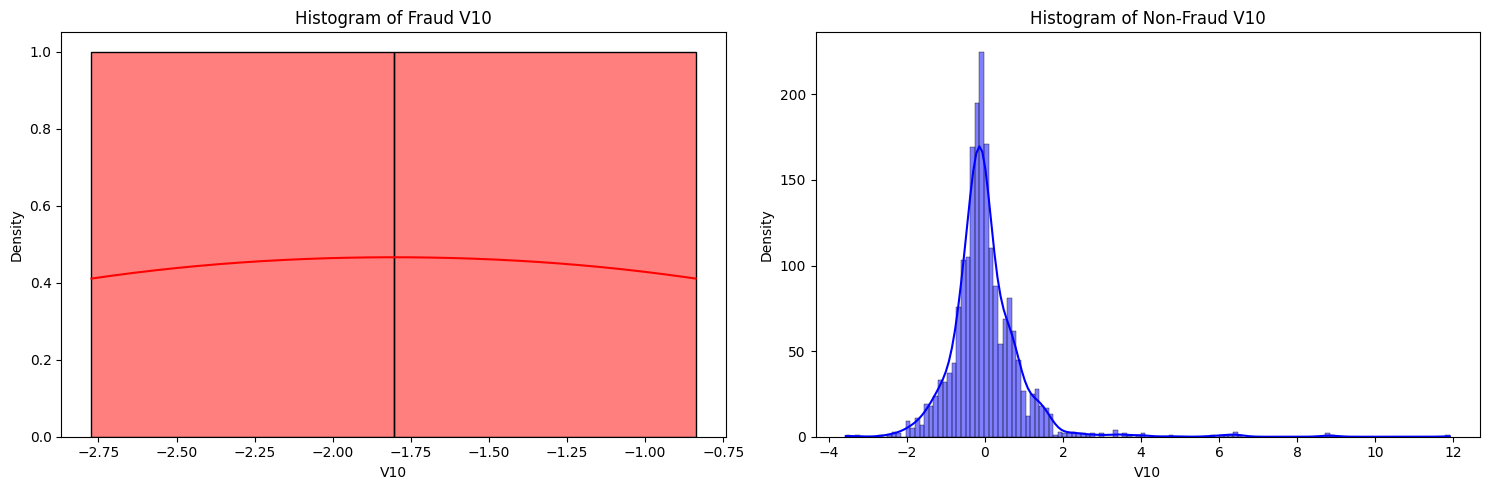

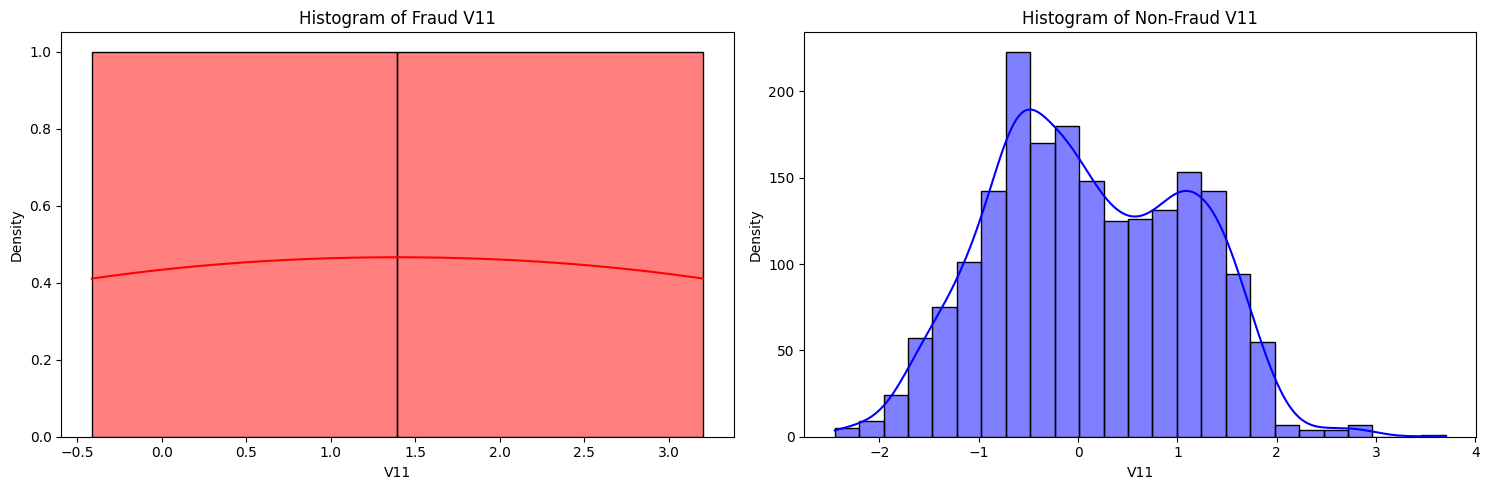

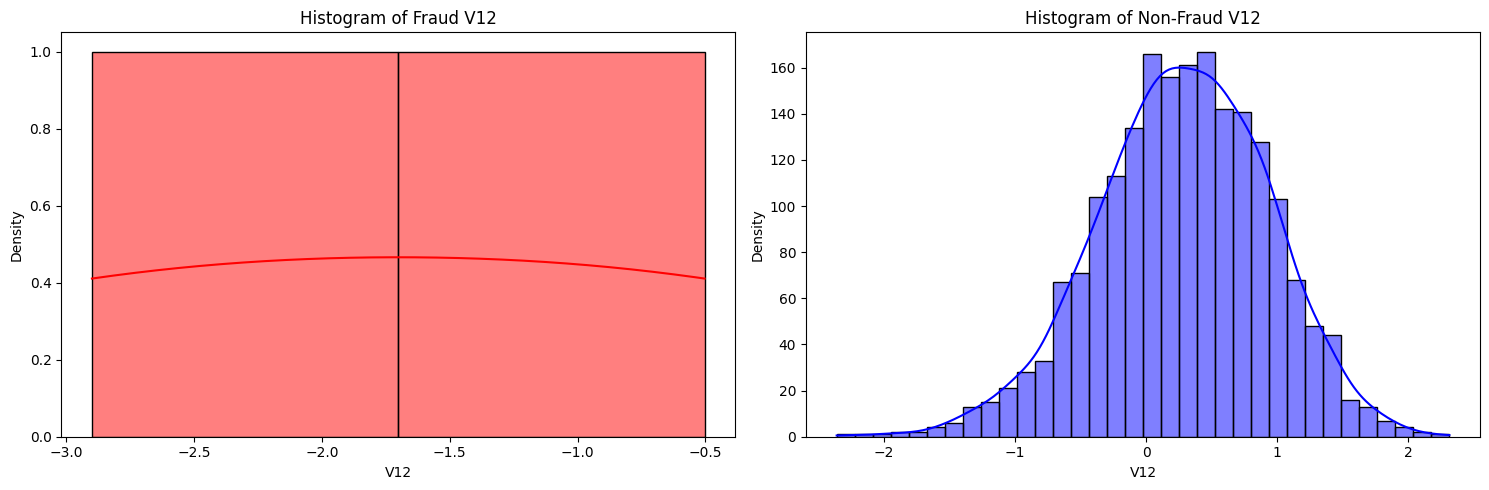

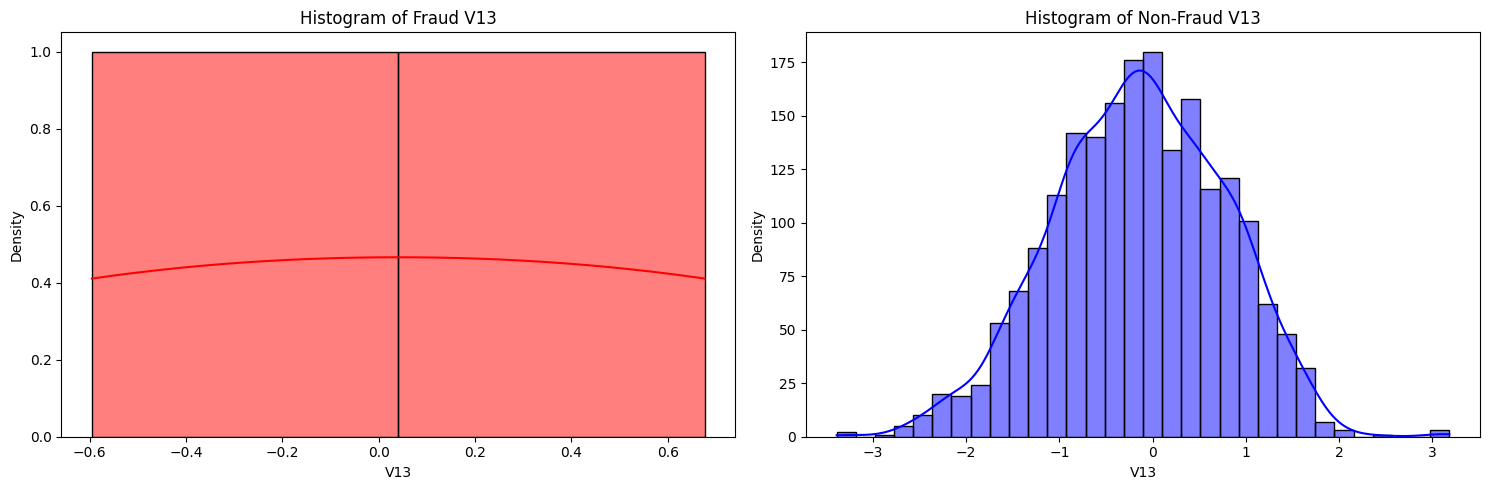

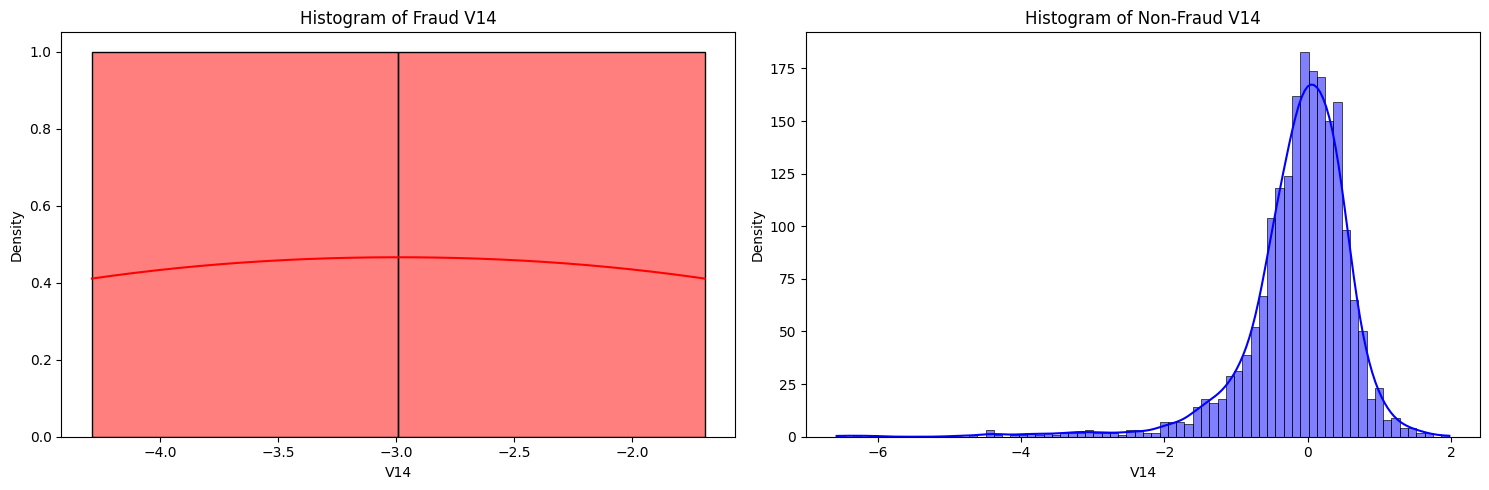

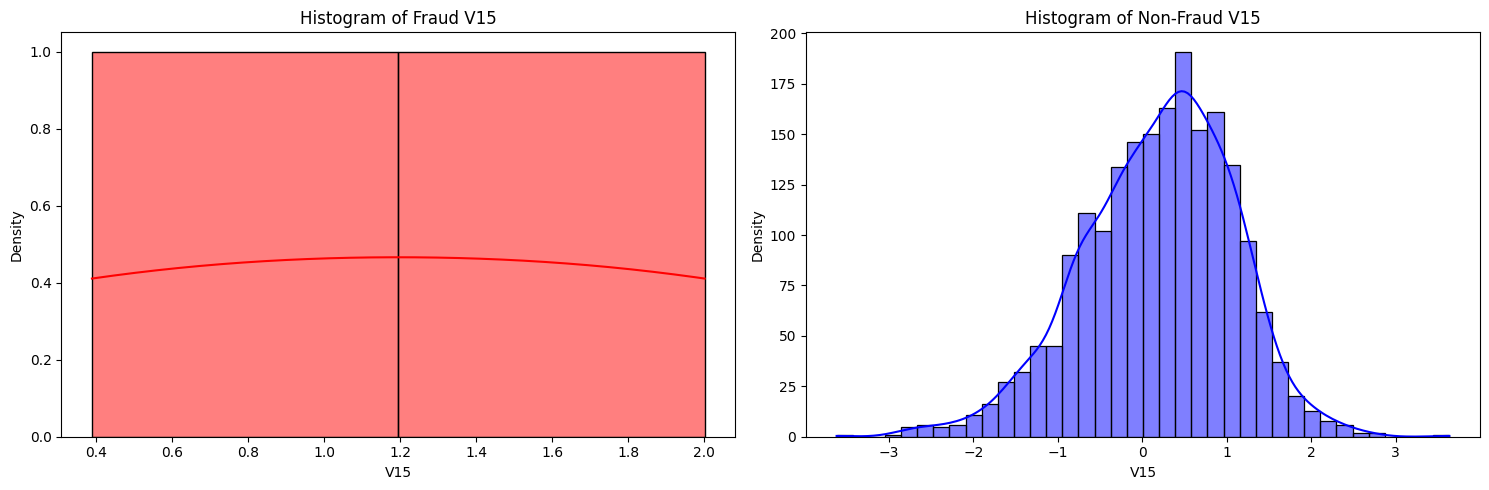

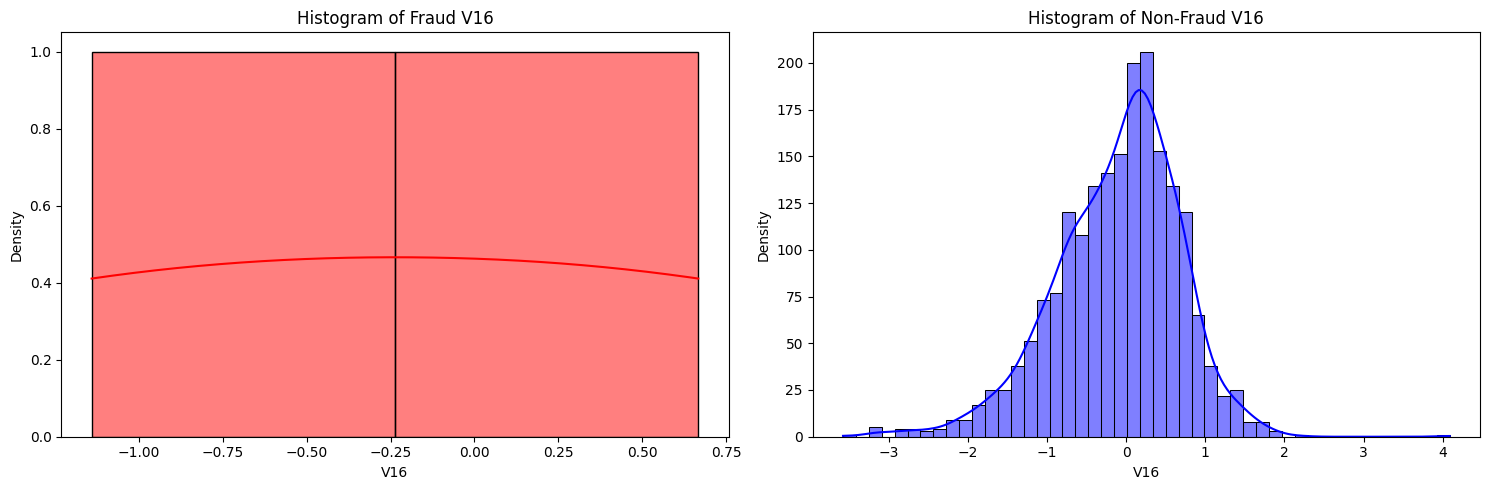

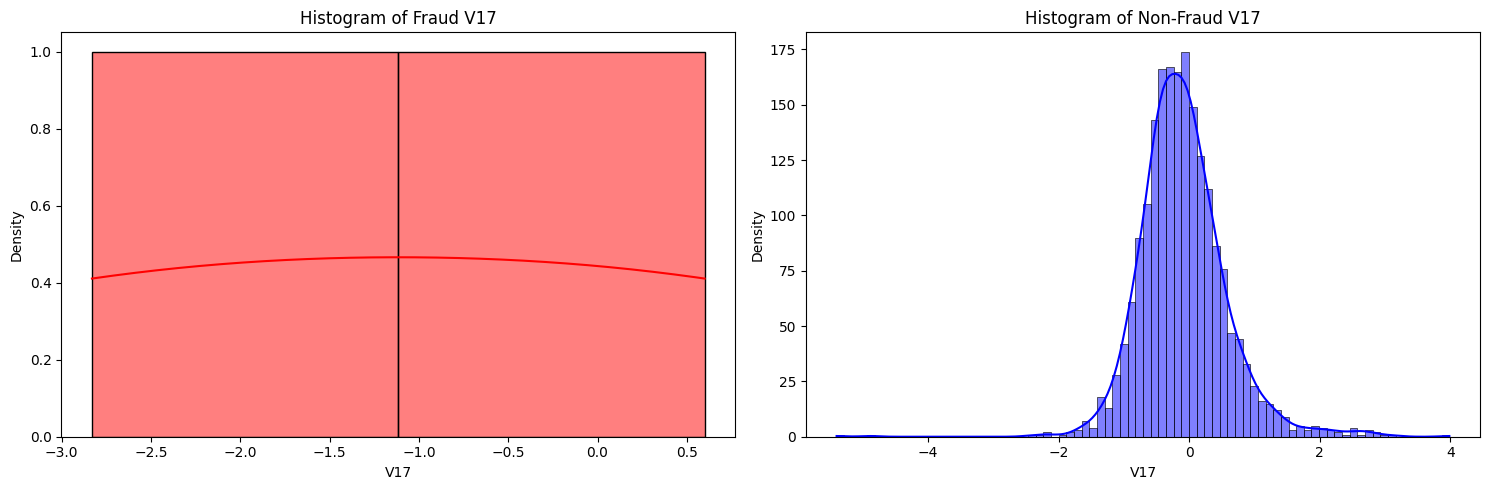

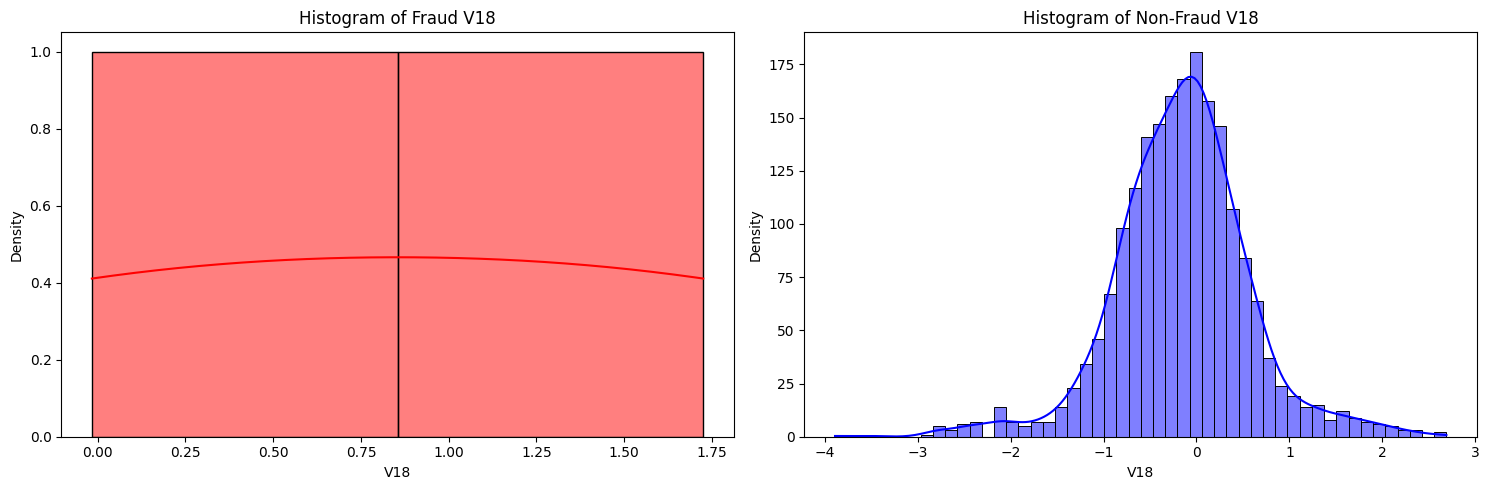

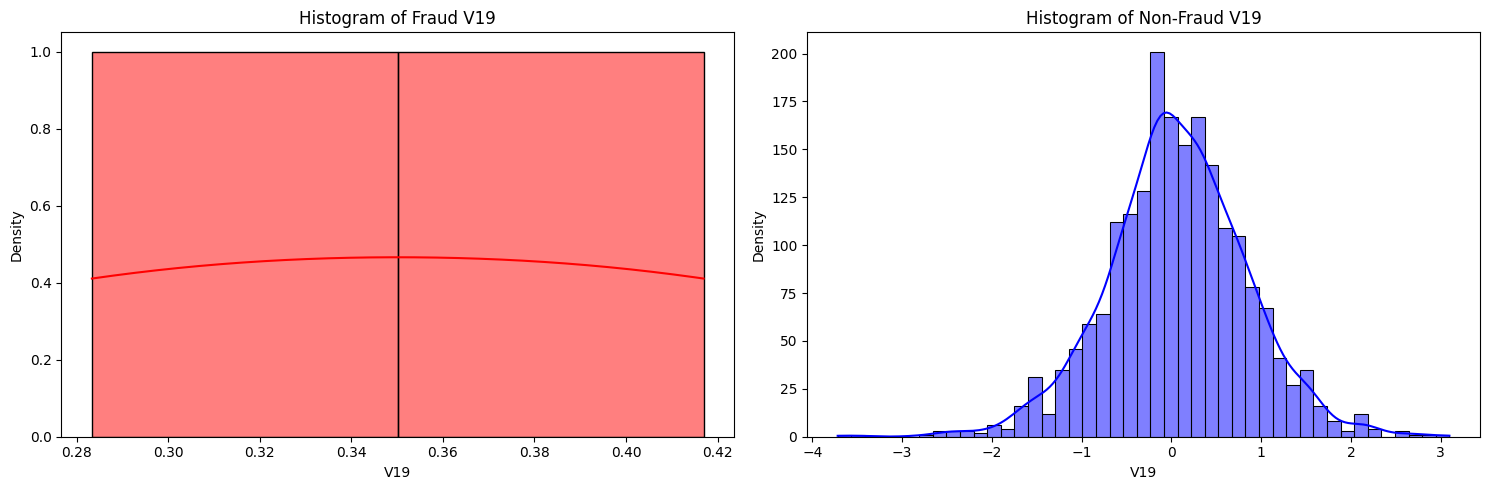

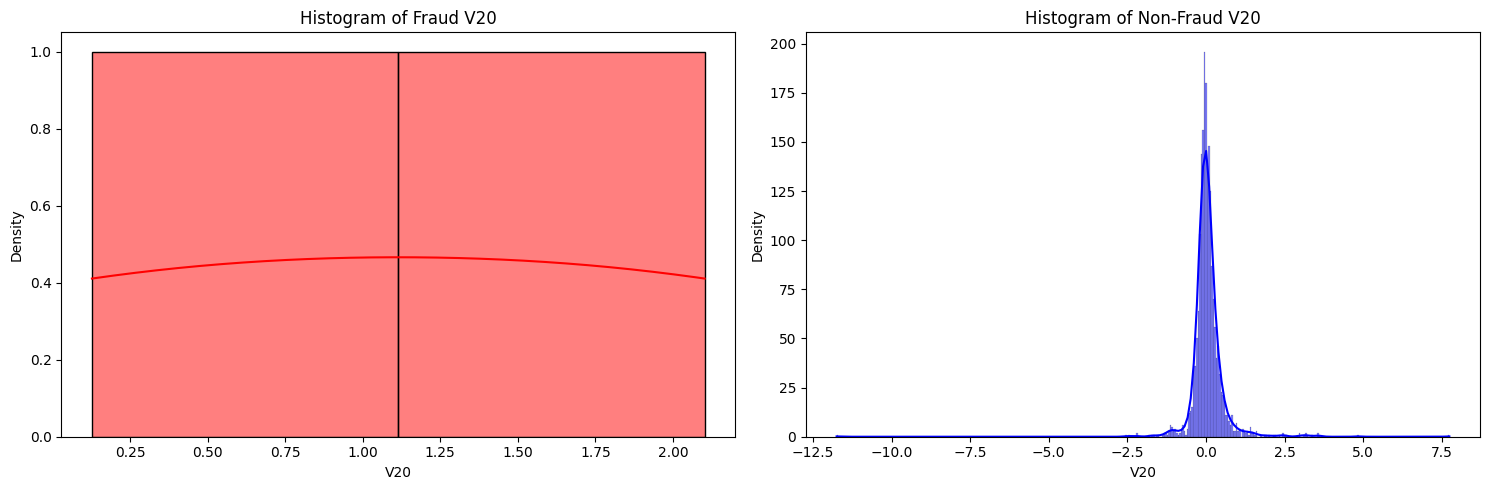

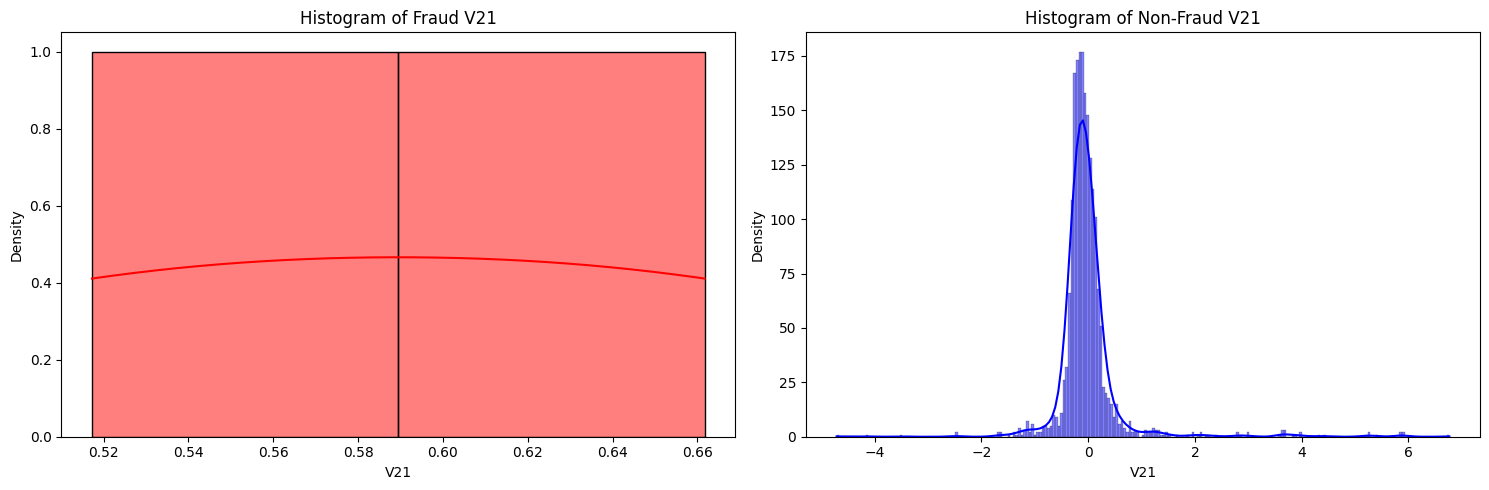

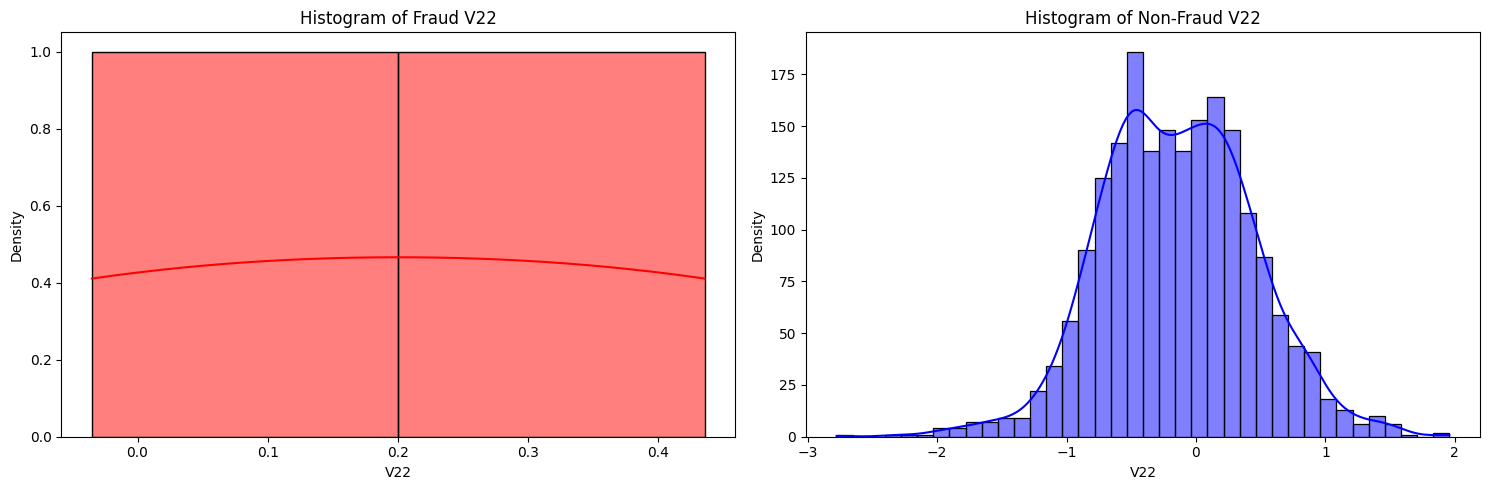

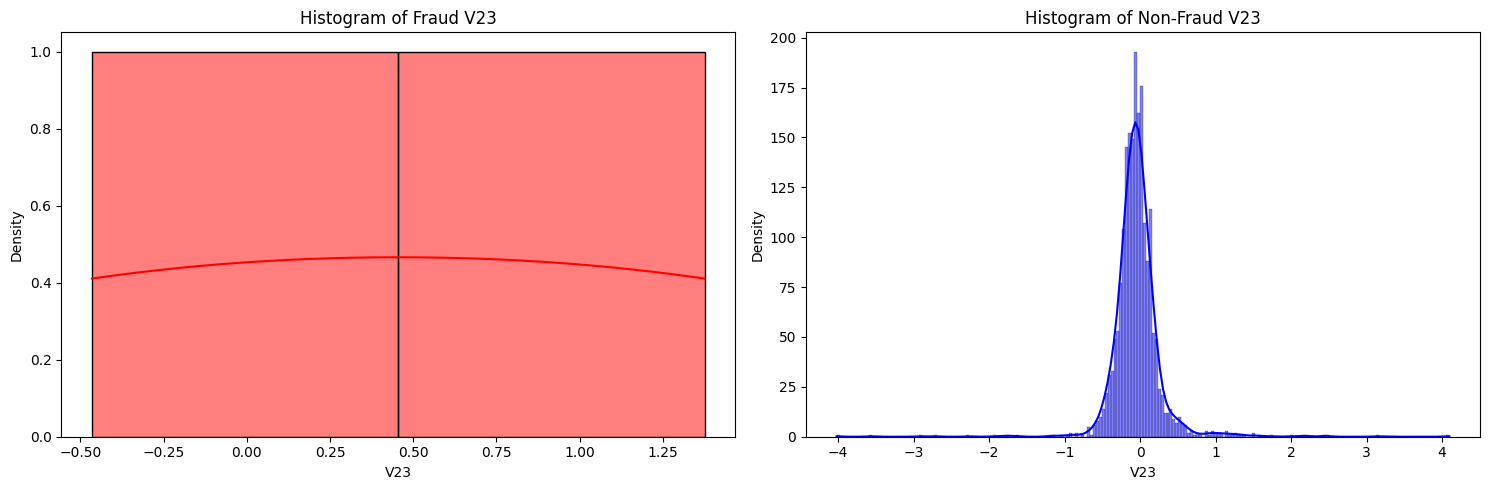

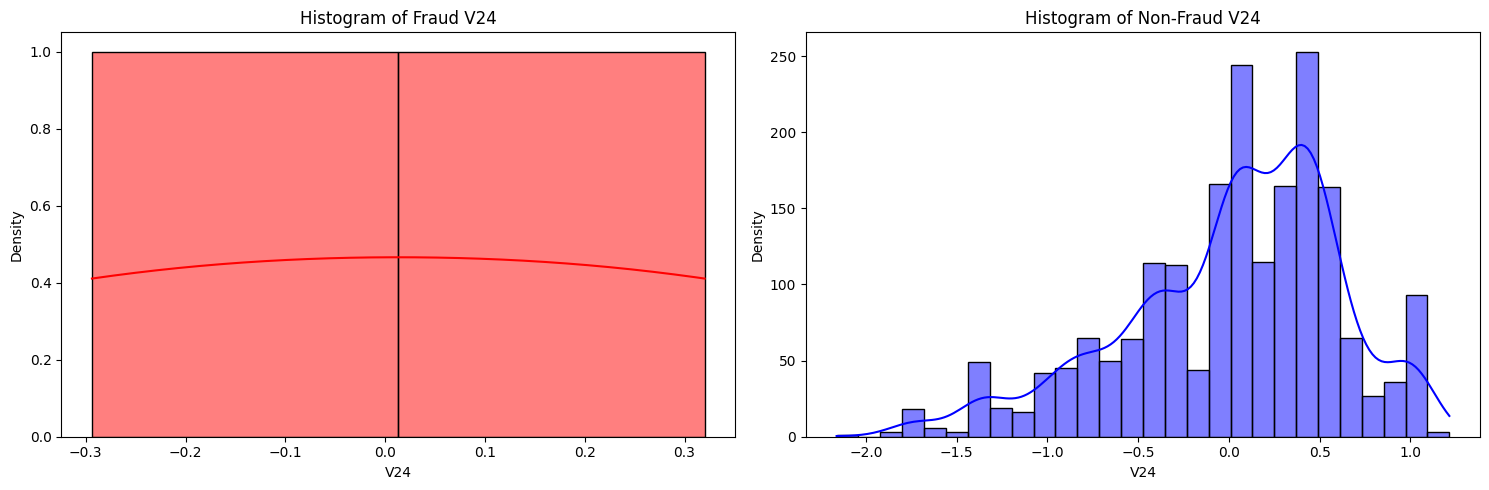

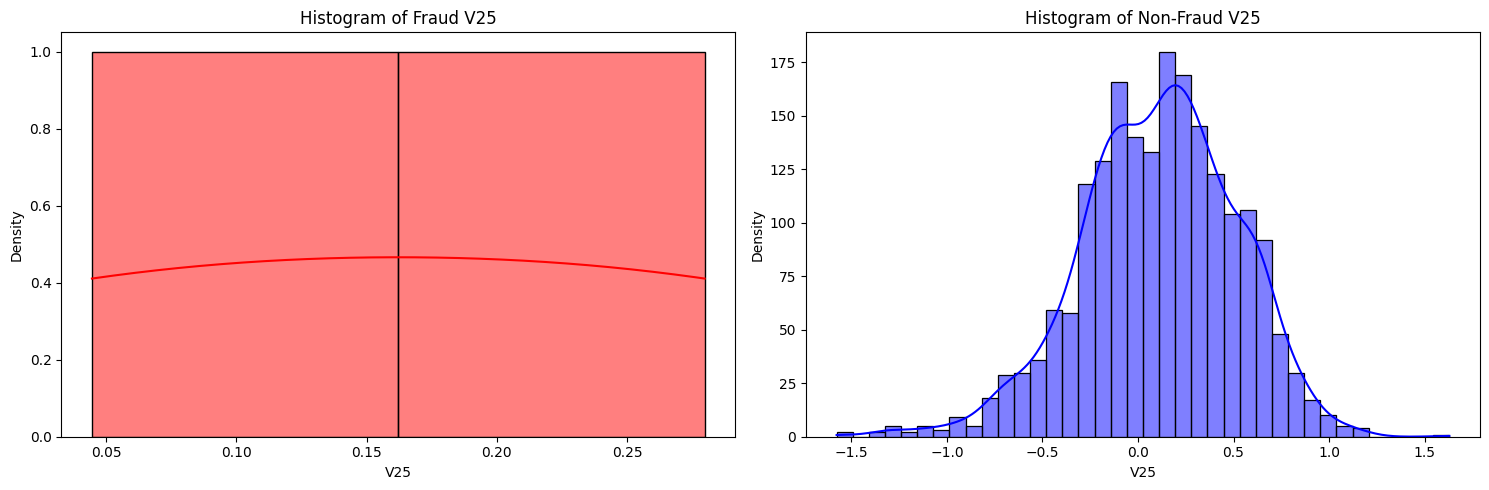

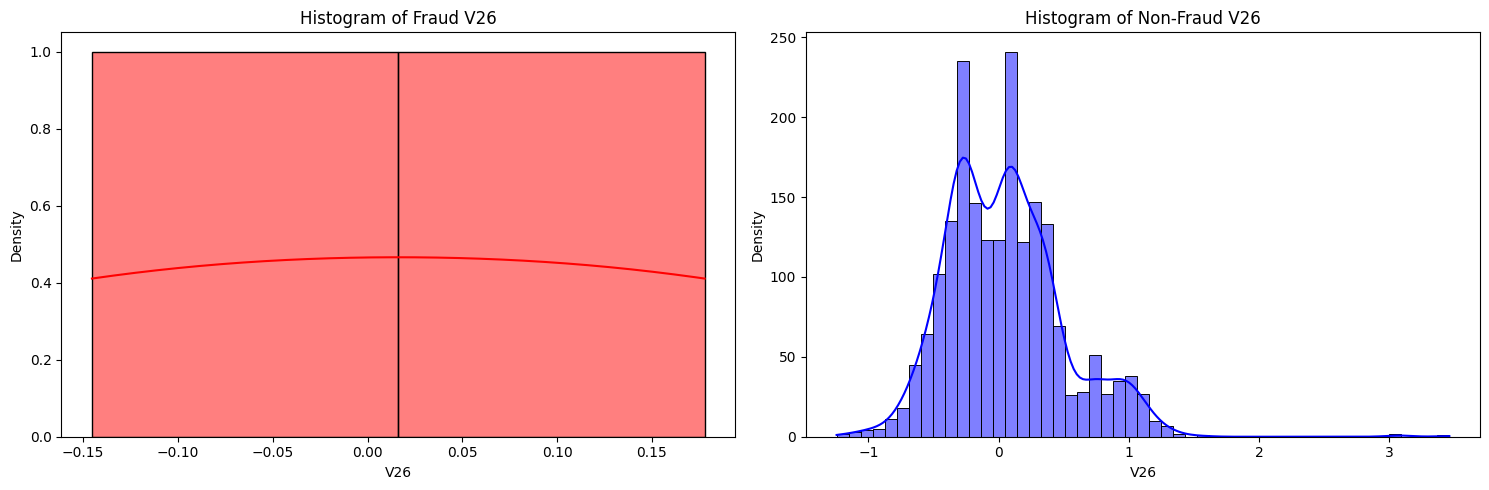

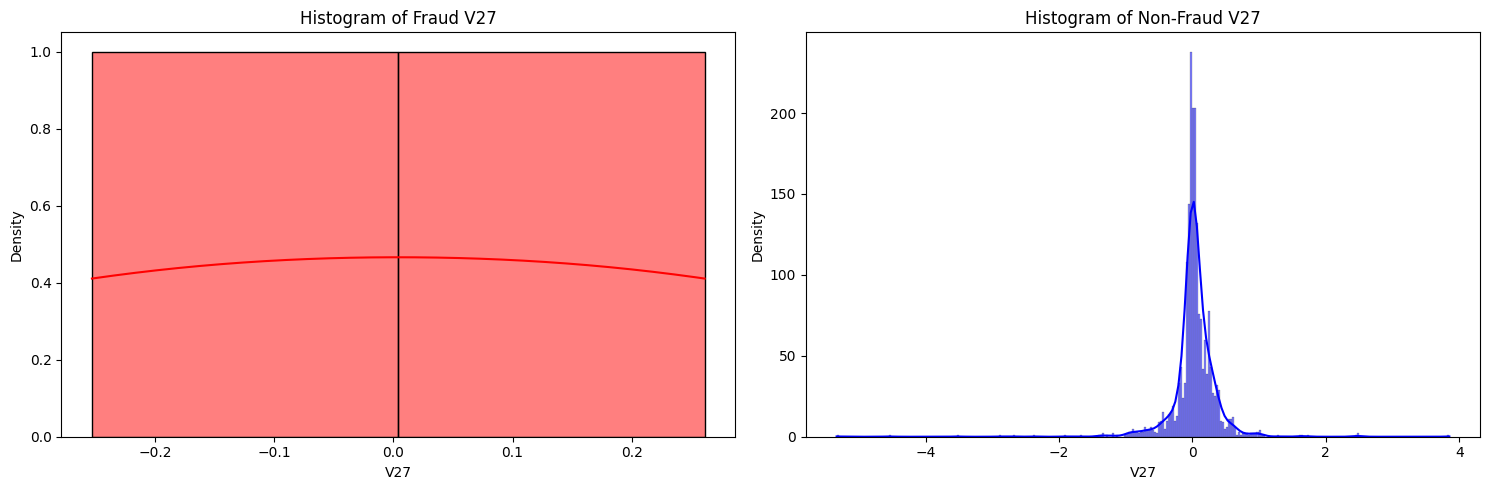

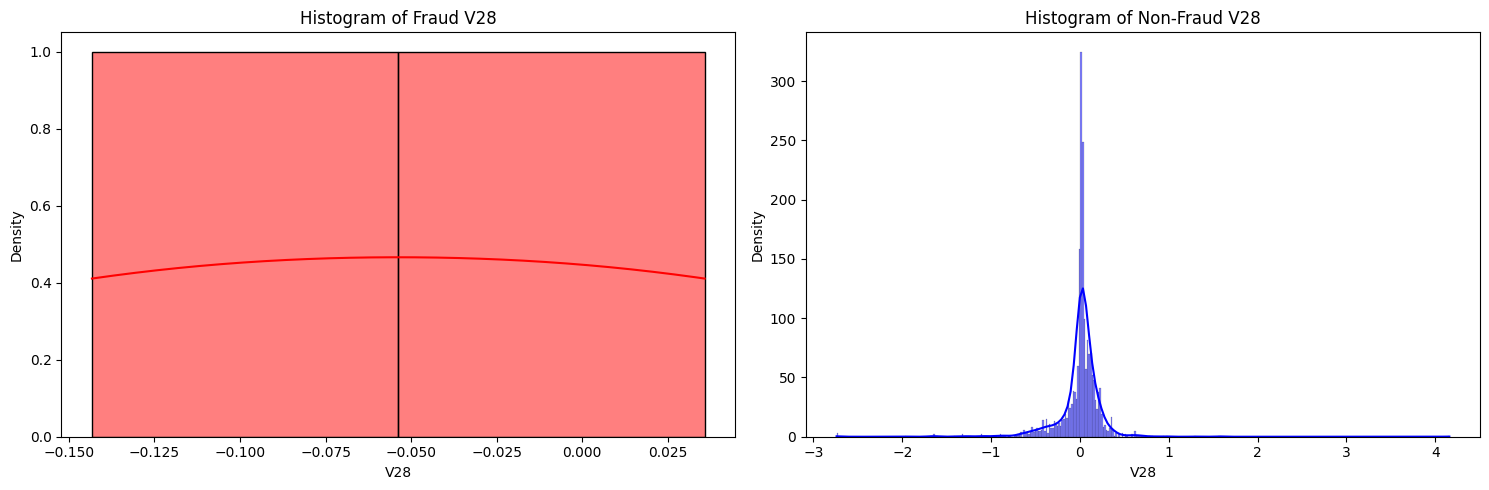

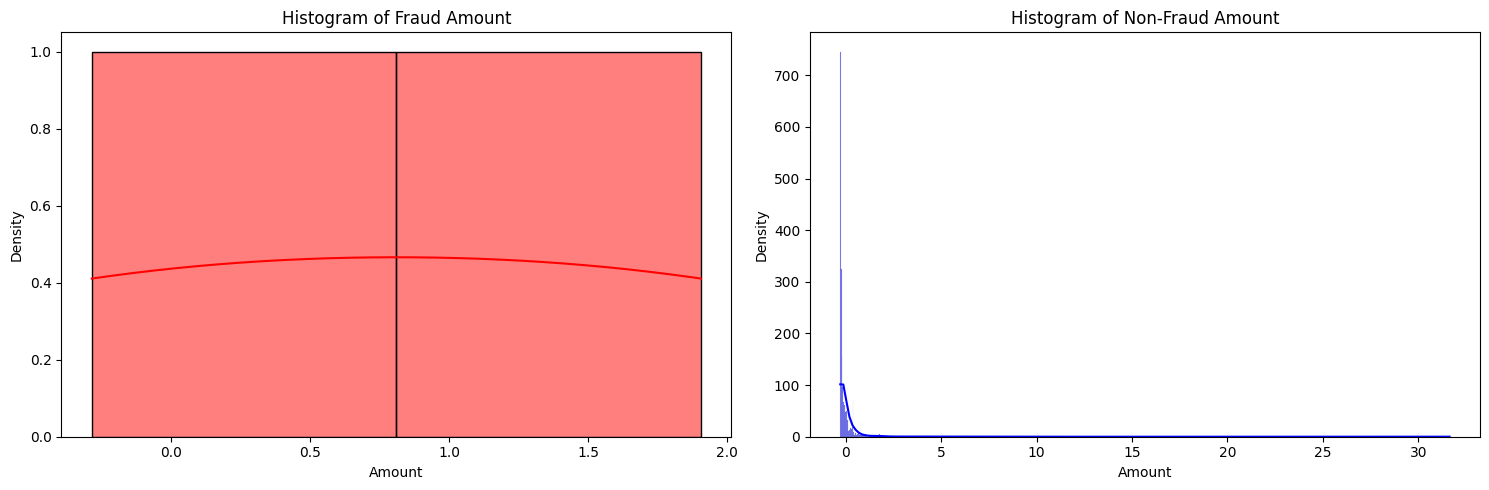

In [43]:
# Showing the distribution of every column from V1:V28 for Fraud and Non Fraud
warnings.filterwarnings("ignore", category=FutureWarning)
for column in df.columns[1:29]:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(fraud[column], kde=True, ax=axes[0], color='red')
    axes[0].set_title('Histogram of Fraud ' + column)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')

    sns.histplot(non_fraud[column], kde=True, ax=axes[1], color='blue')
    axes[1].set_title('Histogram of Non-Fraud ' + column)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

In [51]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport  # Import from the correct library

# Data Profiling
profile = ProfileReport(df)  # Use the imported ProfileReport directly
profile.to_file("Fraud_Detection_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]